In [1]:
pip install suncalc

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for suncalc: filename=suncalc-0.1.2-py3-none-any.whl size=9505 sha256=a75a70ef220ee505b878f82addebf09594511b078bc262921939c6352b6b91ba
  Stored in directory: /home/ben/.cache/pip/wheels/8c/08/1a/1e62d0a81b66c72b97dcfc2f35cb4f8d79a9ebaeaa886af7ed
Successfully built suncalc
Note: you may need to restart the kernel to use updated packages.


In [3]:
from suncalc import get_position, get_times
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm

In [14]:
pv_df = pd.read_pickle('~/Repositories/dissertation/data/devon_pv_readings.pkl')
print(pv_df.columns) # This should only have 6835, 7159, 7245, 7276, 7763
pv_df = pd.DataFrame(pv_df['Mean']) # We actually only care about the mean value

Index(['6835', '7159', '7245', '7276', '7763', 'Mean'], dtype='object')


In [18]:
metadata_df = pd.read_pickle('~/Repositories/dissertation/data/devon_pv_metadata.pkl')
metadata_df

,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at,geometry
4430,6835,50.74,-4.00,E01020330,270.0,40.0,3.99,2012-10-10,POINT (-4.00000 50.74000)
4754,7159,50.64,-4.36,E01018949,160.0,32.0,3.92,2013-02-07,POINT (-4.36000 50.64000)
4840,7245,50.74,-4.01,E01020329,135.0,45.0,4.00,2013-02-18,POINT (-4.01000 50.74000)
4871,7276,50.77,-4.13,E01020322,180.0,30.0,3.92,2013-03-01,POINT (-4.13000 50.77000)
5358,7763,50.76,-4.46,E01018974,186.0,5.0,4.00,2013-08-21,POINT (-4.46000 50.76000)


In [25]:
lat = round(metadata_df.latitude_rounded.mean(),2)
lon = round(metadata_df.longitude_rounded.mean(),2)
print('Average lat, lon :', lat, lon)

Average lat, lon : 50.73 -4.19


In [26]:
pv_df['altitude'] = get_position(pv_df.index, lon, lat).get('altitude')

<AxesSubplot:xlabel='datetime'>

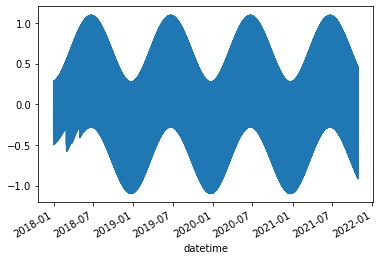

In [27]:
pv_df.altitude.plot()

<AxesSubplot:xlabel='datetime'>

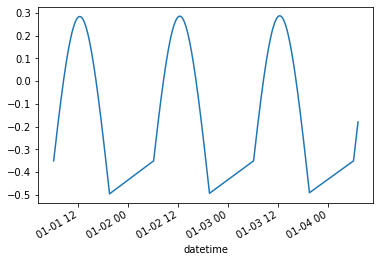

In [30]:
pv_df.altitude[:500].plot() # Highest point at midday 

<AxesSubplot:xlabel='datetime'>

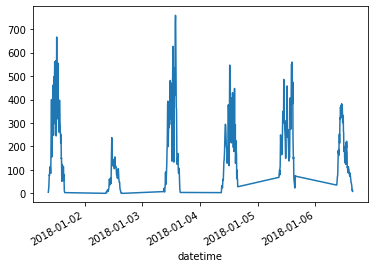

In [34]:
pv_df_sun_crop = pv_df[pv_df.altitude > (5/90)]
pv_df_sun_crop.Mean[:500].plot()

In [35]:
pv_df_sun_crop.to_pickle("~/Repositories/dissertation/data/devon_pv_readings_sun_crop.pkl")

In [36]:
len(pv_df)

387254

In [37]:
len(pv_df_sun_crop)

191768

In [38]:
pv_df_sun_crop

,Mean,altitude
datetime,,
2018-01-01 08:55:00,4.852596,0.060437
2018-01-01 09:00:00,11.429791,0.070311
2018-01-01 09:05:00,22.030056,0.080014
2018-01-01 09:10:00,33.880486,0.089542
2018-01-01 09:15:00,55.284920,0.098891
...,...,...
2021-10-27 16:10:00,39.371063,0.115234
2021-10-27 16:15:00,31.176411,0.103167
2021-10-27 16:20:00,24.779907,0.090984
